# Real Estate - Price Prediction

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("HousingData.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

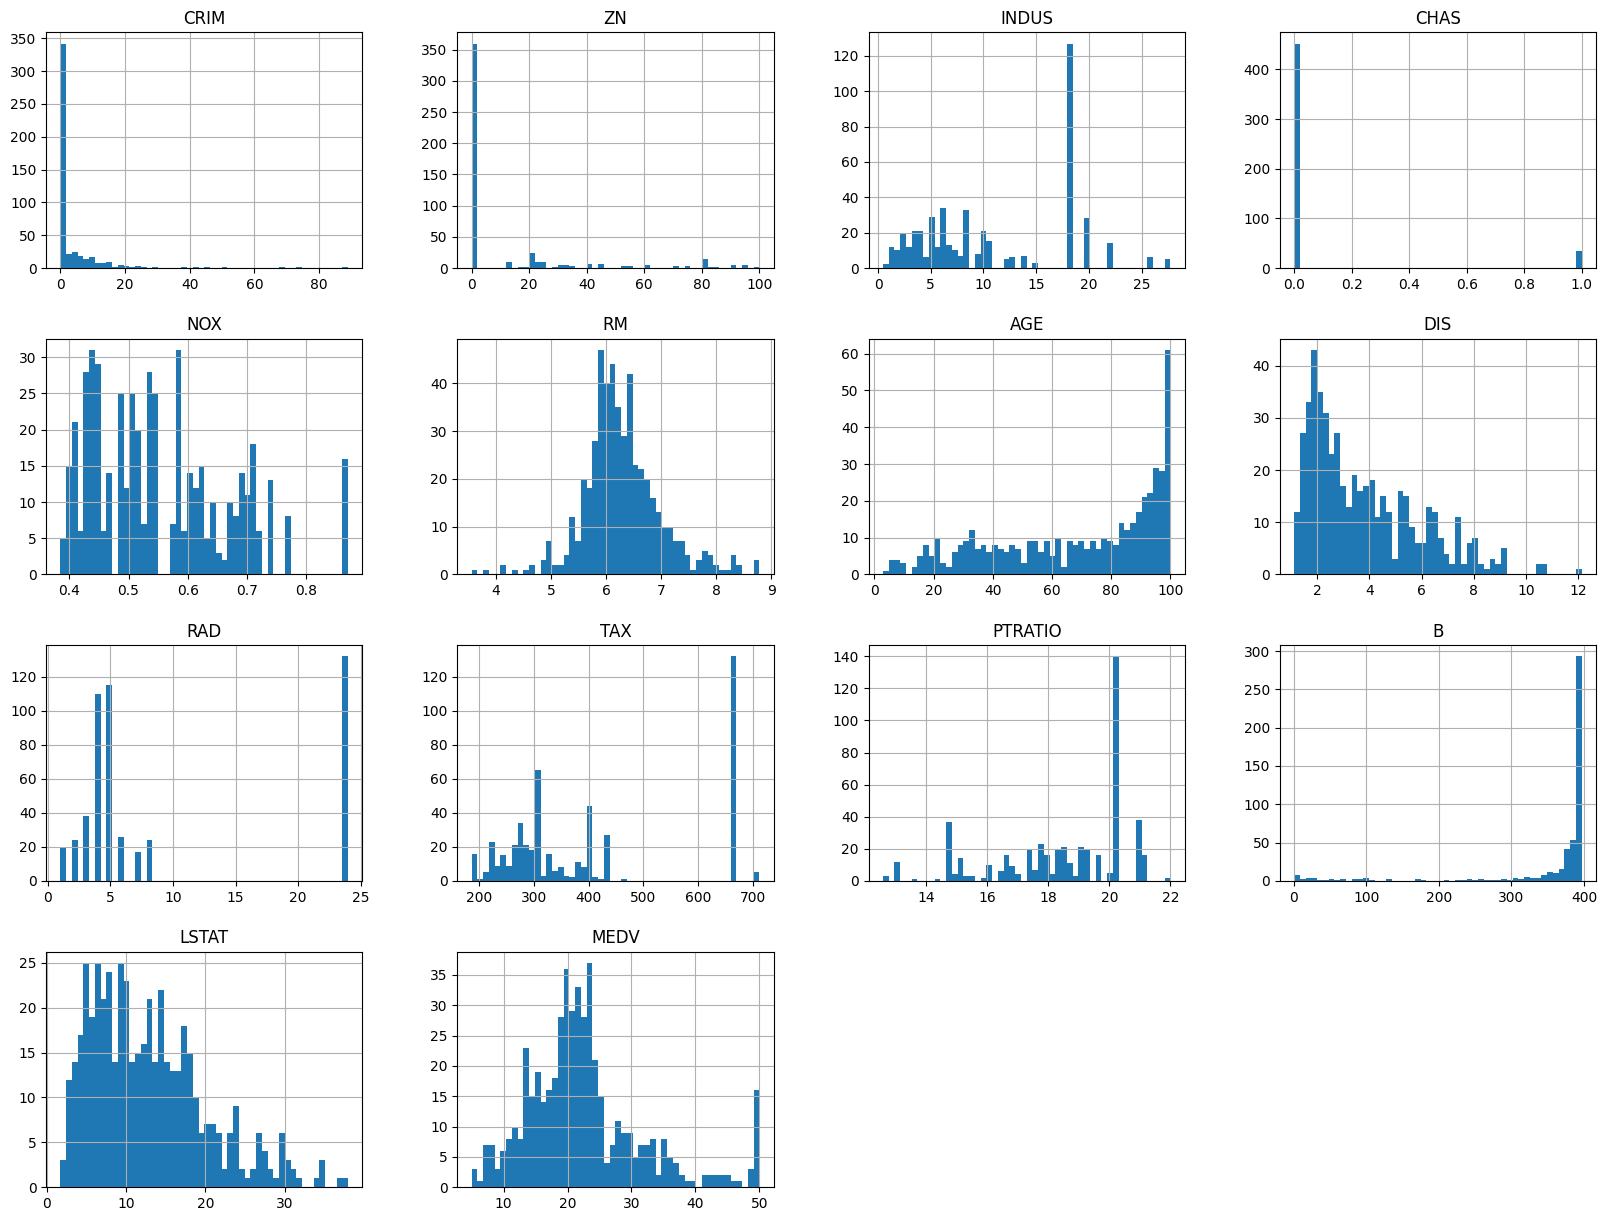

In [8]:
housing.hist(bins=50 , figsize=(20,15))

## Train test Split

In [9]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size=0.2 , random_state=42)
print(f"Row of train set {len(train_set)}\nRow of test set {len(test_set)}")

Row of train set 404
Row of test set 102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Check for NaN values
print(housing['CHAS'].isnull().sum())

# Fill or remove NaN values
housing['CHAS'].fillna(0, inplace=True)  # OR use dropna()

# Convert CHAS to integer
housing['CHAS'] = housing['CHAS'].astype(int)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]


20


/var/folders/hf/r9ryvh3913j5gxs6s3hfpzt00000gn/T/ipykernel_3109/2491387057.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['CHAS'].fillna(0, inplace=True)  # OR use dropna()


In [11]:
start_train_set['CHAS'].value_counts()

CHAS
0    377
1     27
Name: count, dtype: int64

In [12]:
start_test_set['CHAS'].value_counts()


CHAS
0    95
1     7
Name: count, dtype: int64

In [13]:
housing = start_train_set

## Looking for correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
LSTAT     -0.732270
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

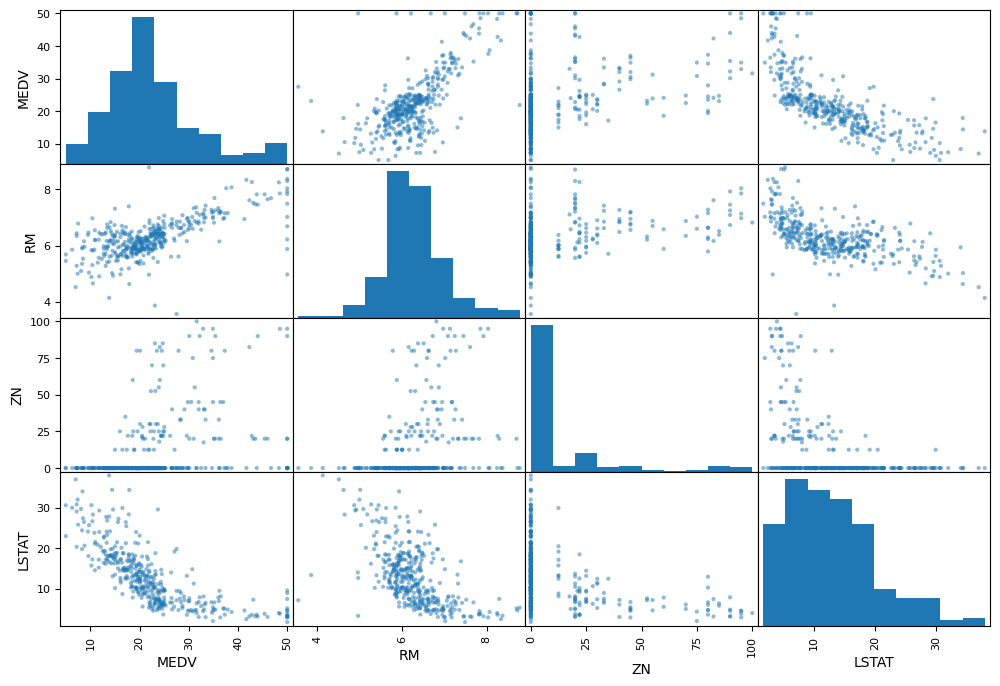

In [15]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

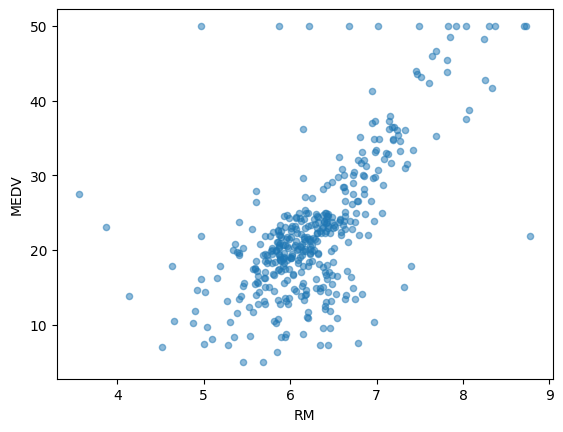

In [16]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

## Trying out atrribute combinations

In [17]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [18]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,17.8,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
TAXRM     -0.520217
LSTAT     -0.732270
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

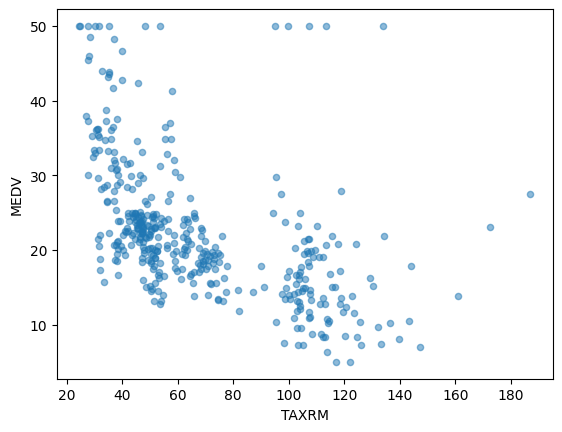

In [20]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.5)

In [21]:
housing = start_train_set.drop("MEDV", axis=1)
housing_label = start_train_set["MEDV"]

## Missing Attributes

In [22]:
#to take care of missing attributes we have three options:
#1.Remove missing data points(dropna)
#2.Remove whole attribute(drop)
#3.Set the value to some value(0, mean or median)


In [23]:
housing.dropna(subset=["RM"]) # option 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,97.468169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,57.083395
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,59.681248
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,113.438937
304,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93,30.679934


In [24]:
housing.drop("RM" , axis=1) #option2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
425,15.86030,0.0,18.10,0,0.679,95.4,1.9096,24,666,20.2,7.68,24.39,112.957938
318,0.40202,0.0,9.90,0,0.544,67.2,3.5325,4,304,18.4,395.21,10.36,47.633971
41,0.12744,0.0,6.91,0,0.448,2.9,5.7209,3,233,17.9,385.41,4.84,34.416544
316,0.31827,0.0,9.90,0,0.544,NaN,3.9986,4,304,18.4,390.70,18.33,51.403449
431,10.06230,0.0,18.10,0,0.584,94.3,2.0882,24,666,20.2,81.33,19.69,97.468169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.14866,0.0,8.56,0,0.520,79.9,2.7778,5,384,20.9,394.76,9.42,57.083395
346,0.06162,0.0,4.39,0,0.442,52.3,8.0136,3,352,18.8,364.61,12.67,59.681248
484,2.37857,0.0,18.10,0,0.583,41.9,3.7240,24,666,20.2,370.73,13.34,113.438937
304,0.05515,33.0,2.18,0,0.472,41.1,4.0220,7,222,18.4,393.68,6.93,30.679934


In [25]:
median= housing["RM"].median()

In [26]:
housing["RM"].fillna(median)

425    5.896
318    6.382
41     6.770
316    5.914
431    6.833
       ...  
100    6.727
346    5.898
484    5.871
304    7.236
392    5.036
Name: RM, Length: 404, dtype: float64

In [27]:
from sklearn.impute  import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([2.83920000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.77500000e+01, 3.10730000e+00,
       5.00000000e+00, 3.41000000e+02, 1.91000000e+01, 3.90975000e+02,
       1.17400000e+01, 5.52434233e+01])

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.699779,10.382426,11.232599,0.066832,0.557777,6.280760,69.876238,3.745757,9.745050,411.539604,18.489109,353.730421,12.839381,67.253766
std,9.194859,22.608913,6.671452,0.250040,0.116376,0.702466,27.166717,2.095471,8.723025,168.190814,2.135190,95.032131,7.066410,31.115760
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,24.645639
25%,0.091487,0.000000,5.725000,0.000000,0.453000,5.878750,47.350000,2.042200,4.000000,283.250000,17.400000,374.650000,7.215000,44.801475
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000,55.243423
75%,3.489463,0.000000,18.100000,0.000000,0.625750,6.620500,94.025000,5.100400,24.000000,666.000000,20.200000,395.945000,16.945000,98.317507
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,187.026116


## Scikit_learn Design

## Primarily there are three tyoes of objects:
 1.Estimator - estimates some parameter based on dataset. Eg. imputer
 it has fit method and transform method

 2.Transformer - takes input and returns output based on learnings form fit.it has fit_transform() function

 3.Predictors - LinearRegression is example of predictor.fir() and predict() are two functions

## Creating Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer( strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [34]:
housing_num_tr

array([[ 1.32417465, -0.45978766,  1.03064757, ..., -3.64591946,
         1.63660765,  1.47066443],
       [-0.35909713, -0.45978766, -0.19999414, ...,  0.43702072,
        -0.35130362, -0.63132387],
       [-0.3889965 , -0.45978766, -0.64872813, ...,  0.33376984,
        -1.13343265, -1.05663295],
       ...,
       [-0.14386809, -0.45978766,  1.03064757, ...,  0.17910424,
         0.0709327 ,  1.48614199],
       [-0.39686825,  1.0016235 , -1.35859829, ...,  0.42090094,
        -0.83730046, -1.17686923],
       [ 0.85785866, -0.45978766,  1.03064757, ...,  0.45482623,
         1.8193878 ,  2.09137226]], shape=(404, 14))

## Selection a Desired model for Real Estate

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model=DecisionTreeRegressor()
model.fit(housing_num_tr , housing_label)

DecisionTreeRegressor()

In [36]:
some_data = housing.iloc[:5]

In [37]:
some_label = housing_label.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([ 8.3, 23.1, 26.6, 17.8, 14.1])

In [40]:
list(some_label)

[8.3, 23.1, 26.6, 17.8, 14.1]

## Evaluating Model

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [42]:
lin_mse

0.0